<a href="https://colab.research.google.com/github/oakaigh/cogs118b-wi22-final-project/blob/main/cogs118b_wi22_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 118B Final Project: Classification of Wine Quality through clustering

## Group Members

* Dhanush Nanjunda Reddy
* Dhruv Sood
* Sohan Ghosh
* Gilberto Robles
* Arjun Gujral
* Jared Chen


## Import Relevant Libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

def _set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
_set_constrained_layout(plt)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def is_none(a):
    return isinstance(a, type(None))

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols = ncols, 
        nrows = int(np.ceil(n / ncols))
    )
    axs = axs.flatten()
    for ax in axs:
        ax.set_visible(visible)
    return fig, axs

def figure_height_adjust(fig, ratio = 1 / 4):
    fig_w, fig_h = fig.get_size_inches()
    fig_w, fig_h = fig_w, fig_h * len(fig.get_axes()) * ratio
    fig.set_size_inches(fig_w, fig_h)
    return fig

In [3]:
import numpy as np
import pandas as pd

import sklearn as skl
import sklearn.preprocessing

## Data Processing

### Load Dataset

In [4]:
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
    delimiter = ';'
)

### Preprocessing

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Check for null values.

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Check for data types.

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Check how many unique classifying labels there are.


In [8]:
classes = np.sort(data['quality'].unique())

💅

In [9]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Normalization

In [10]:
y = np.asarray(data['quality'])
X = np.asarray(
    skl.preprocessing.MinMaxScaler()
    .fit_transform(
        data.drop('quality', axis = 1)
    )
)
K = len(data['quality'].unique())
_, N = X.shape

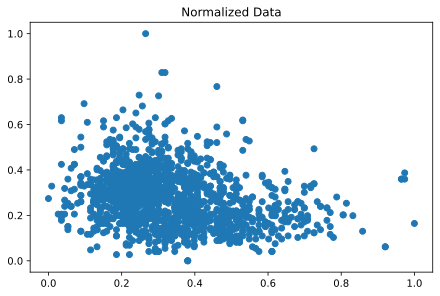

In [11]:
fig, ax = plt.subplots()
ax.set(title = "Normalized Data")
ax.scatter(X[:,0], X[:,1])
fig.show()

## PCA

Using PCA to reduce 11 dimensions down to 2.

In [12]:
def eigsort(V, eigvals):
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.    
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

# normc(M) normalizes the columns of M to a length of 1.
def normc(Mat):
    return skl.preprocessing.normalize(Mat, norm='l2', axis=0)

Get the mean of the data.

In [13]:
mean = np.mean(X, axis=1)[:,None]
mean.shape

(1599, 1)

Standardization.

In [14]:
A = X - mean
A.shape

(1599, 11)

Compute the eigenvectors and eigenvalues of `A.T @ A`.

In [15]:
lamda, eig = np.linalg.eig(A.T @ A)

eig.shape

(11, 11)

Sort eigvectors and eigvals.

In [16]:
V, vals = eigsort(eig, lamda)

Get the eigenvectors of `A @ A.T`.

If $V$ is the eigenvector matrix of $A^\top A$ with eigenvalues $\lambda$, 
which is more easily computed than the eigenvectors of $A A^\top$.

To get the eigenvectors of $A A^\top$, we can follow:
$$
    \begin{align*}
        A^\top A V &= \lambda V \\
        A A^\top A (V) &= A \lambda V\\
        (A A^\top) (A V) &= \lambda (A V)
    \end{align*}
$$

Note: Parentheses denote multiplication.

Thus, $U = A V$, is an eigenvector matrix of $A A^\top$ (`A @ A.T`), with the same eigenvalues $\lambda$.

In [17]:
U = A @ V
U.shape

(1599, 11)

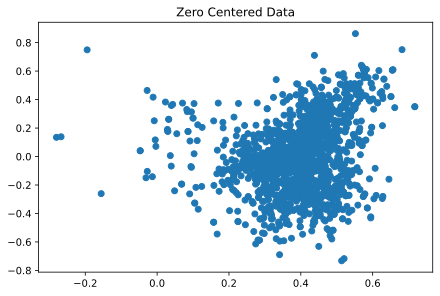

In [18]:
fig, ax = plt.subplots()
ax.set(title = 'Zero Centered Data')
ax.scatter(U[:,0], U[:,1])
fig.show()

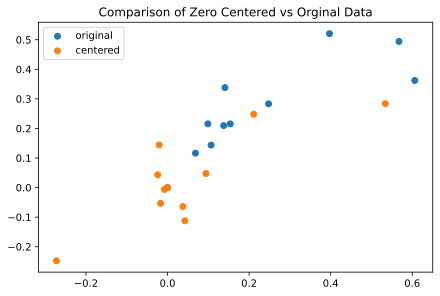

In [19]:
fig, ax = plt.subplots()
ax.set(title = 'Comparison of Zero Centered vs Orginal Data')
ax.scatter(X[0], X[1], label = 'original')
ax.scatter(U[0], U[1], label = 'centered')
ax.legend()
fig.show()

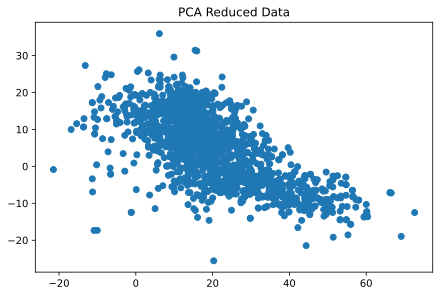

In [20]:
# calculate principal components
c = U.T @ (X - mean)

# using 11 principal components 
z = U[:,:11] @ c[:11,:] + mean

fig, ax = plt.subplots()
ax.set(title = 'PCA Reduced Data')
ax.scatter(z[:,0], z[:,1])
fig.show()

## K-Means

In [21]:
def plotCurrent(X, Rnk, Kmus):
    N, D = X.shape
    K, _ = Kmus.shape

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])
    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    # idx keeps track of the labels of each point
    u, idx = np.unique(colorVec, axis=0, return_inverse=True)
    muColorVec = np.dot(np.eye(K), KColorMat)
    
    plt.scatter(
        X[:,0], X[:,1], 
        edgecolors = 'none', facecolors = colorVec, 
        alpha = 1 / 4
    )
    plt.scatter(
        Kmus[:,0], Kmus[:,1], 
        c = muColorVec, s = 50,
        marker = 'D'
    )
    plt.show()
    return idx

In [22]:
def calcSqDistances(X, kmus):
    return (
        (-2 * X @ kmus.T + np.sum(kmus**2, axis = 1).T).T 
            + np.sum(X**2, axis = 1)
    ).T

def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis = 1)
    return np.eye(sqDmat.shape[1])[m]

def recalcMus(X, Rnk):
    return ((X.T @ Rnk) / np.sum(Rnk, axis = 0)).T

def runKMeans(K, X):
    N, D = np.shape(X)
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]]
    maxiters = 1000
    
    for iter in range(maxiters):
        #calculate sum of squares distances
        sqDmat = calcSqDistances(X, Kmus)

        #calculate responsibility matrix
        Rnk = determineRnk(sqDmat)

        #save the old centroid to compare
        Kmus_old = Kmus

        #recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        #check to see if the cluster centers have converged.  If so, break.
        if (sum(abs(Kmus_old.flatten() - Kmus.flatten()))) < 1e-6:
            break
    # return Kmus
    kmeans = plotCurrent(X, Rnk, Kmus)
    return kmeans

### K-Means Clustering on PCA Reduced Data

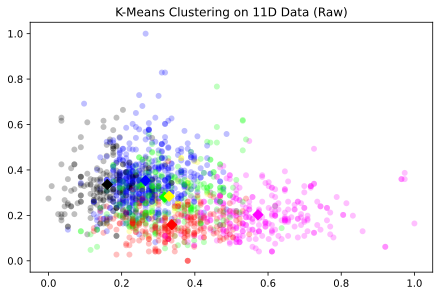

In [23]:
plt.title('K-Means Clustering on 11D Data (Raw)')
kmeans_11_raw = runKMeans(K, X)

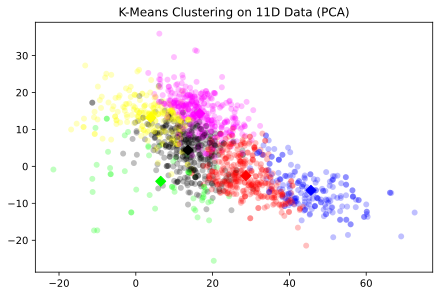

In [24]:
plt.title("K-Means Clustering on 11D Data (PCA)")
kmeans_11_pca = runKMeans(K, z)

### K-means on 4 dimensions
For this section we decide to limit the variables to the 4 deemed most important from the research paper we found. These are
1. sulphates
2. pH
3. total sulfur dioxide
4. alcohol

We will then run K-Means on these 4 dimensions, as well as the post PCA reduced data.

In [25]:
data_4 = data[['sulphates', 'pH', 'alcohol', 'total sulfur dioxide']]

X_4 = np.asarray(
    skl.preprocessing.MinMaxScaler()
    .fit_transform(
        data_4
    )
)

# get the mean of the data
mean_4 = np.mean(X_4, axis = 1)[:, None]

# standardisation
A_4 = X_4 - mean_4

# compute eigenvectors and eigenvalues of A.T * A
lambda_4, eig_4 = np.linalg.eig(A_4.T @ A_4)

# sort eigenvectors and eigenvalues
V_4, vals_4 = eigsort(eig_4, lambda_4)
U_4 = A_4 @ V_4

# calculate principal components
c_4 = U_4.T @ A_4
z_4 = U_4 @ c_4 + mean_4

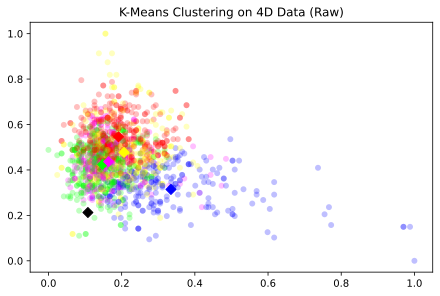

In [26]:
plt.title('K-Means Clustering on 4D Data (Raw)')
kmeans4_raw = runKMeans(K, X_4)

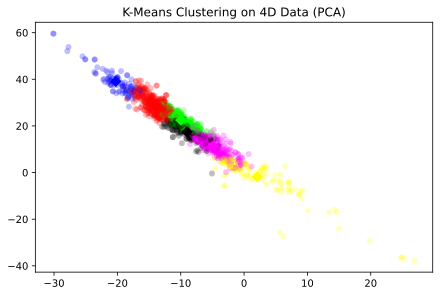

In [27]:
plt.title('K-Means Clustering on 4D Data (PCA)')
kmeans4_pca = runKMeans(K, z_4)

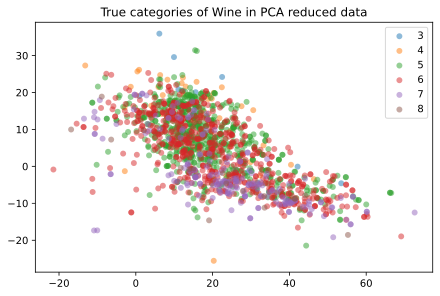

In [32]:
df_pca = pd.DataFrame(data = {
    'col1': z[:, 0], 
    'col2': z[:, 1], 
    'y': y
})

fig, ax = plt.subplots()
for name, group in df_pca.groupby('y'):
    ax.scatter(
        group['col1'], group['col2'], 
        label = name, 
        edgecolors = 'none', alpha = 1 / 2
    )
ax.set(title = "True Categories of Wine in PCA Reduced Data")
ax.legend()
fig.show()

## Clustering Evaluation

How well do the labels of the clusters correspond with the labels of quality

In [29]:
import sklearn.metrics.cluster as skl_cluster

# 11 dimension evaluation
print(skl_cluster.adjusted_rand_score(y, kmeans_11_raw))
print(skl_cluster.adjusted_rand_score(y, kmeans_11_pca))

# 4 dimension evaluation
print(skl_cluster.adjusted_rand_score(y, kmeans4_raw))
print(skl_cluster.adjusted_rand_score(y, kmeans4_pca))

0.07642180528961072
0.03431898688441985
0.08152284029075828
0.03752765814443805
